# Теория вероятностей и математическая статистика

## Урок 8

## Дисперсионный анализ. Метод главных компонент. Логистическая регрессия

### Домашнее задание

Теория вероятностей и математическая статистика Урок 8 Дисперсионный анализ. Метод главных компонент. Логистическая регрессия

Задача 1
*Используя данные о хоккеистах (скачать можно [здесь](https://habr.com/ru/post/301340/)), проверьте, является ли среди хоккеистов из Финляндии, Норвегии и Дании значимым отличие роста. В качестве ответа запишите 1, если является, и 0 иначе.

*_Подсказка_: не забудьте предобработать данные (например, дублируются ли данные о конкретных игроках?).


In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('hockey_players.csv', encoding='windows-1252')
df.head(5)

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
0,2001,RUS,10,tverdovsky oleg,D,L,185,84.0,1976-05-18,anaheim mighty ducks,24.952772,1976,24.543462
1,2001,RUS,2,vichnevsky vitali,D,L,188,86.0,1980-03-18,anaheim mighty ducks,21.119781,1980,24.332277
2,2001,RUS,26,petrochinin evgeni,D,L,182,95.0,1976-02-07,severstal cherepovetal,25.229295,1976,28.680111
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
4,2001,RUS,32,orekhovsky oleg,D,R,175,88.0,1977-11-03,dynamo moscow,23.490760,1977,28.734694


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6292 entries, 0 to 6291
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      6292 non-null   int64  
 1   country   6292 non-null   object 
 2   no        6292 non-null   int64  
 3   name      6292 non-null   object 
 4   position  6292 non-null   object 
 5   side      6291 non-null   object 
 6   height    6292 non-null   int64  
 7   weight    6292 non-null   float64
 8   birth     6292 non-null   object 
 9   club      6292 non-null   object 
 10  age       6292 non-null   float64
 11  cohort    6292 non-null   int64  
 12  bmi       6292 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 639.2+ KB


In [4]:
# сколько уникальных стран - ищем страны по условию задачи
df['country'].unique()

array(['RUS', 'AUT', 'BLR', 'CAN', 'CZE', 'FIN', 'GER', 'ITA', 'JPN',
       'LAT', 'NOR', 'SUI', 'SVK', 'SWE', 'UKR', 'USA', 'POL', 'SLO',
       'DEN', 'FRA', 'KAZ', 'HUN'], dtype=object)

In [5]:
#ВАЖНО. по условиям задачи - ищем дуликаты игроков
df[df.duplicated(subset = ['name','birth', 'country'], keep=False)]

,year,country,no,name,position,side,height,weight,birth,club,age,cohort,bmi
3,2001,RUS,28,zhdan alexander,D,R,178,85.0,1971-08-28,ak bars kazan,29.675565,1971,26.827421
5,2001,RUS,4,zhukov sergei,D,L,193,93.0,1975-11-23,lokomotiv yaroslavl,25.437372,1975,24.967113
8,2001,RUS,13,razin andrei,F,L,180,85.0,1973-10-23,metallurg magnitogorsk,27.520876,1973,26.234568
9,2001,RUS,14,datsyuk pavel,F,L,178,86.0,1978-07-20,ak bars kazan,22.781656,1978,27.143037
15,2001,RUS,23,prokopiev alexander,F,R,181,85.0,1971-06-10,avangard omsk,29.891855,1971,25.945484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6271,2016,USA,5,murphy connor,D,R,193,96.0,1993-03-26,arizona coyotes,23.099247,1993,25.772504
6276,2016,USA,11,nelson brock,F,L,191,93.0,1991-10-15,new york islanders,24.544832,1991,25.492722
6280,2016,USA,21,larkin dylan,F,L,185,86.0,1996-07-30,detroit red wings,19.753593,1996,25.127831
6281,2016,USA,23,hendricks matt,F,L,183,94.0,1981-06-17,edmonton oilers,34.872005,1981,28.068918


In [6]:
#df = df.sort_values(by='name')
# удаляем найденные дубликаты
df2 = df.drop_duplicates(subset = ['name','birth', 'country'], keep=False)

In [7]:
#информация об очищенном от дубликов датасете - иначе результат будет другой
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 6291
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      1989 non-null   int64  
 1   country   1989 non-null   object 
 2   no        1989 non-null   int64  
 3   name      1989 non-null   object 
 4   position  1989 non-null   object 
 5   side      1988 non-null   object 
 6   height    1989 non-null   int64  
 7   weight    1989 non-null   float64
 8   birth     1989 non-null   object 
 9   club      1989 non-null   object 
 10  age       1989 non-null   float64
 11  cohort    1989 non-null   int64  
 12  bmi       1989 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 217.5+ KB


Статистика для проверки гипотезы $H_0$:
$$F = \dfrac{\sigma_b^2}{\sigma_w^2}$$
где,
$$\sigma_b^2 = \dfrac{SS_b}{k - 1}, \:\: \sigma_w^2 = \dfrac{SS_w}{n - k}$$
$$SS_b = \displaystyle\sum_{i=1}^k \left( \overline{Y_i} - \overline{Y} \right)^2 n_i, \:\:
SS_w = \displaystyle\sum_{i=1}^k \displaystyle\sum_{j=1}^{n_i} \left( y_{ij} - \overline{Y_i} \right)^2,$$

In [8]:
# Требуется проверить гипотезу у различном росте по каждой группе. 
# Для проверки этой гипотезы воспользуемся однофакторным дисперсионным анализом.
# создаем три выборки для анализа по каждой стране

y1 = df2.loc[df2['country']=='FIN'][['height']]
y2 = df2.loc[df2['country']=='NOR'][['height']]
y3 = df2.loc[df2['country']=='DEN'][['height']]

n1 = y1.shape[0]
n2 = y2.shape[0]
n3 = y3.shape[0]

n1, n2, n3

(113, 47, 78)

In [9]:
#Выборочные средние по каждой группе:
y1_mean = y1.mean()
y2_mean = y2.mean()
y3_mean = y3.mean()

y1_mean, y2_mean, y3_mean

(height    184.300885
 dtype: float64,
 height    182.553191
 dtype: float64,
 height    184.423077
 dtype: float64)

In [10]:
#Соберём все значения роста в один массив:
y = np.concatenate([y1, y2, y3])

In [11]:
# посчитаем среднюю
y_mean = y.mean()
y_mean

183.99579831932772

Найдём значения $SS_b$ и $SS_w$:

In [12]:
SS_b = n1 * (y1_mean - y_mean) ** 2 + n2 * (y2_mean - y_mean) ** 2 + n3 * (y3_mean - y_mean) ** 2

SS_w = ((y1 - y1_mean) ** 2).sum() + ((y2 - y2_mean) ** 2).sum() + ((y3 - y3_mean) ** 2).sum()

SS_b, SS_w

(height    122.570404
 dtype: float64,
 height    6190.425394
 dtype: float64)

Запишем оценки дисперсий:

In [13]:
k = 3
n = n1 + n2 + n3

k1 = k - 1
k2 = n - k

sigma2_b = SS_b / k1
sigma2_w = SS_w / k2

sigma2_b, sigma2_w

(height    61.285202
 dtype: float64,
 height    26.342236
 dtype: float64)

Итак, значение статистики $F$:

In [14]:
F = sigma2_b / sigma2_w
F

height    2.3265
dtype: float64

Критическая область здесь правосторонняя:
$$\Omega_\alpha = \left( t_{1 - \alpha, \: k_1, k_2}, \infty \right),$$
где $t_{x, \: k_1, k_2}$ — квантиль порядка $x$ для распределения Фишера с параметрами $k_1$, $k_2$.
В предположении верности гипотезы $H_0$ статистика $F$ имеет распределение Фишера с параметрами $k_1 = k - 1$, $k_2 = n - k$
Зафиксируем уровень значимости $\alpha = 0.05$. Для него найдём нужный нам квантиль:


In [15]:
from scipy import stats
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
t

3.0342478897111547

Итак, наша критическая область имеет вид:
$$\Omega_\alpha = \left( 3.03, \infty \right)$$

In [16]:
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

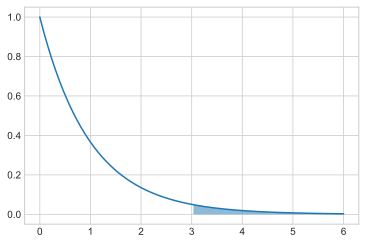

In [17]:
ox = np.linspace(0, 6, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 6, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

In [18]:
# альтернативный способ
stats.f_oneway(y1, y2, y3)

F_onewayResult(statistic=array([2.32649964]), pvalue=array([0.09988189]))

Из полученных данных (с учетом убранных дубликатов записей), видим, что значение F = 2,32 не попало в критическау область (3,03 и более). т.о. получается, что отличие роста у хоккеистов Финляндии, Норвегии и Дании не имеет значимого отличия.
Ответ: 0